# 1) Introdução
Blablabla

In [116]:
import requests
from google.colab import userdata
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib.dates import YearLocator
import seaborn as sns
import numpy as np
import itertools
import warnings


warnings.filterwarnings('ignore')

# 2) Obtendo os dados da API da EIA
Blablabla

In [117]:
def obter_fechamento_petroleo_brent(offset: int = 0) -> pd.DataFrame:
  api_key = userdata.get('eia-api-key')
  per_request = 5000
  url = f'https://api.eia.gov/v2/petroleum/pri/spt/data/?frequency=daily&data[0]=value&facets[series][]=RBRTE&sort[0][column]=period&sort[0][direction]=desc&offset={offset}&length={per_request}&api_key={api_key}'

  response = requests.get(url)
  df = pd.DataFrame()

  if response.status_code == 200:
      data = response.json()
      df = pd.DataFrame(data['response']['data'])
  else:
      print("Falha na requisição:", response.status_code)

  return df

In [118]:
df1 = obter_fechamento_petroleo_brent()
df2 = obter_fechamento_petroleo_brent(5000)
df_concat = pd.concat([df1, df2], ignore_index=True)

In [119]:
df_concat.shape

(9383, 11)

In [120]:
df_concat.head()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2024-04-22,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),87.3,$/BBL
1,2024-04-19,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),87.96,$/BBL
2,2024-04-18,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),88.34,$/BBL
3,2024-04-17,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),89.54,$/BBL
4,2024-04-15,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),90.84,$/BBL


In [121]:
df_concat.tail()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
9378,1987-05-26,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.63,$/BBL
9379,1987-05-25,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.6,$/BBL
9380,1987-05-22,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.55,$/BBL
9381,1987-05-21,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.45,$/BBL
9382,1987-05-20,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),18.63,$/BBL


In [122]:
# verificando se a concatenação funcionou no limite da paginação (5000 registros)
df_concat.iloc[4995:5005, :]

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
4995,2004-08-19,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),44.84,$/BBL
4996,2004-08-18,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),44.12,$/BBL
4997,2004-08-17,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),44.05,$/BBL
4998,2004-08-16,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),44.35,$/BBL
4999,2004-08-13,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),44.13,$/BBL
5000,2004-08-12,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),43.5,$/BBL
5001,2004-08-11,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),42.45,$/BBL
5002,2004-08-10,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),42.5,$/BBL
5003,2004-08-09,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),43.21,$/BBL
5004,2004-08-06,ZEU,NA,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),42.63,$/BBL


## 2.1) Exportando os dados da API

In [123]:
df_concat.to_csv('preco-petroleo-brent-eia.csv', index=False)

In [124]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9383 entries, 0 to 9382
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              9383 non-null   object
 1   duoarea             9383 non-null   object
 2   area-name           9383 non-null   object
 3   product             9383 non-null   object
 4   product-name        9383 non-null   object
 5   process             9383 non-null   object
 6   process-name        9383 non-null   object
 7   series              9383 non-null   object
 8   series-description  9383 non-null   object
 9   value               9383 non-null   object
 10  units               9383 non-null   object
dtypes: object(11)
memory usage: 806.5+ KB


## 2.2) Testando os dados exportados

In [125]:
df = pd.read_csv('preco-petroleo-brent-eia.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9383 entries, 0 to 9382
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   period              9383 non-null   object 
 1   duoarea             9383 non-null   object 
 2   area-name           0 non-null      float64
 3   product             9383 non-null   object 
 4   product-name        9383 non-null   object 
 5   process             9383 non-null   object 
 6   process-name        9383 non-null   object 
 7   series              9383 non-null   object 
 8   series-description  9383 non-null   object 
 9   value               9383 non-null   float64
 10  units               9383 non-null   object 
dtypes: float64(2), object(9)
memory usage: 806.5+ KB


## 2.3) Padronizando os dados originais para uma timeseries

In [126]:
df.period = pd.to_datetime(df.period)
df.head()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2024-04-22,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),87.30,$/BBL
1,2024-04-19,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),87.96,$/BBL
2,2024-04-18,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),88.34,$/BBL
3,2024-04-17,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),89.54,$/BBL
4,2024-04-15,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE,Europe Brent Spot Price FOB (Dollars per Barrel),90.84,$/BBL


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9383 entries, 0 to 9382
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   period              9383 non-null   datetime64[ns]
 1   duoarea             9383 non-null   object        
 2   area-name           0 non-null      float64       
 3   product             9383 non-null   object        
 4   product-name        9383 non-null   object        
 5   process             9383 non-null   object        
 6   process-name        9383 non-null   object        
 7   series              9383 non-null   object        
 8   series-description  9383 non-null   object        
 9   value               9383 non-null   float64       
 10  units               9383 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 806.5+ KB


In [128]:
df_oil = df[['period', 'value']]
df_oil.columns = ['ds', 'y']
df_oil.head()

,ds,y
0,2024-04-22,87.30
1,2024-04-19,87.96
2,2024-04-18,88.34
3,2024-04-17,89.54
4,2024-04-15,90.84


## 2.4) Exportandos os dados padronizados

In [129]:
df_oil.to_csv('timeseries-petroleo-brent.csv', index=False)

In [130]:
df_oil = pd.read_csv('timeseries-petroleo-brent.csv')
df_oil.ds = pd.to_datetime(df_oil.ds)
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9383 entries, 0 to 9382
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      9383 non-null   datetime64[ns]
 1   y       9383 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 146.7 KB


## 2.5) Analisando os dados históricos

<Axes: xlabel='y', ylabel='Count'>

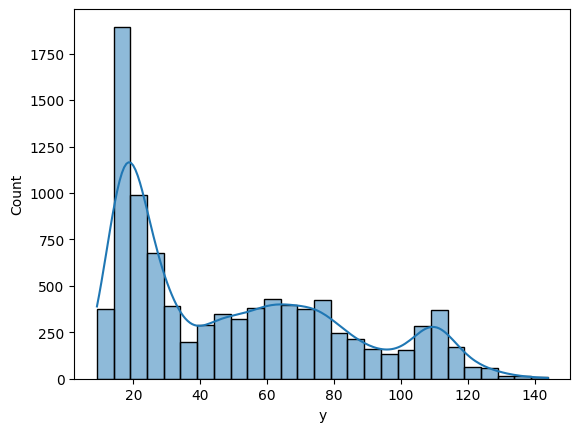

In [131]:
sns.histplot(data=df_oil.y, kde=True)

<Axes: ylabel='y'>

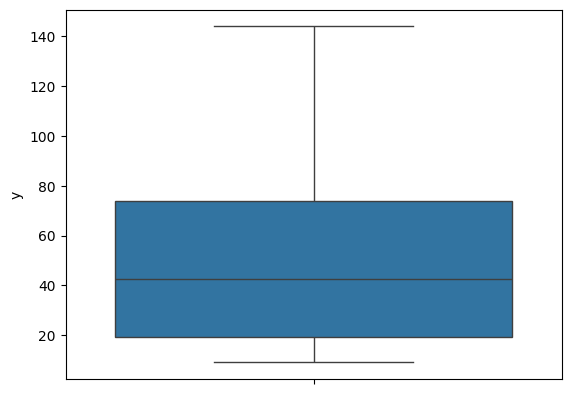

In [132]:
sns.boxplot(data=df_oil.y)

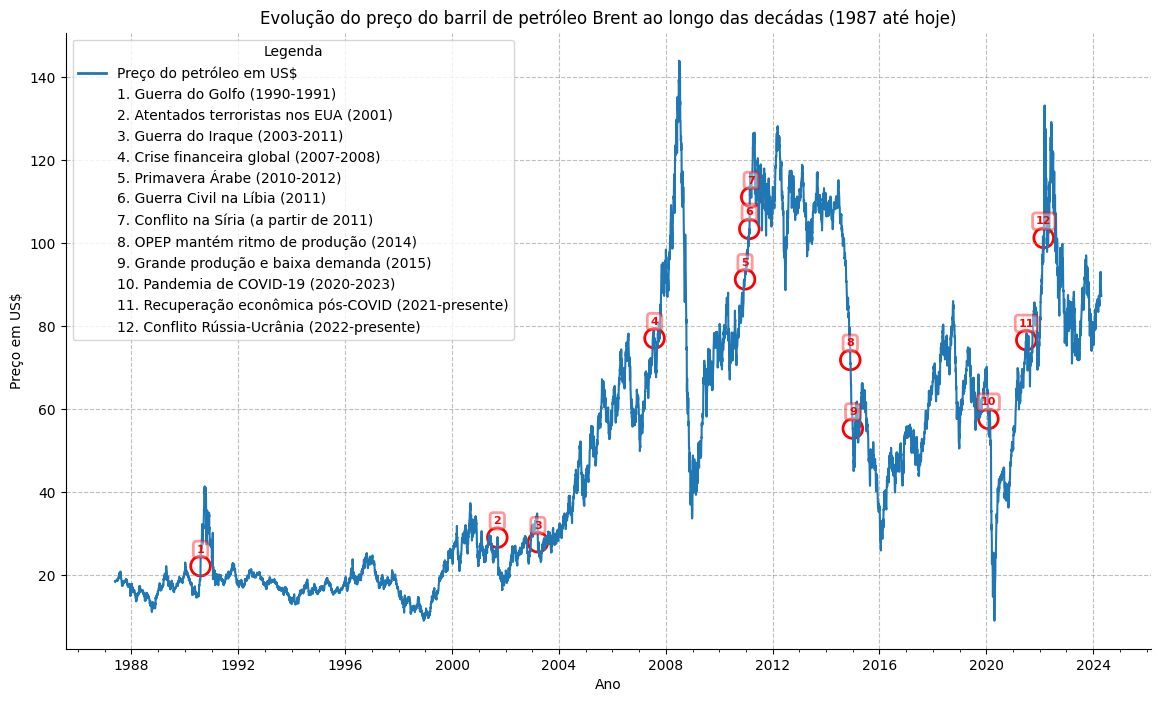

In [133]:
def plot_momentos_chaves_preco_petroleo(ponto: pd.Series, id_evento: int):
  if not ponto.empty:
    plt.scatter(ponto.ds, float(ponto.y), s=200, facecolors='none', edgecolors='red', linewidths=2)
    plt.text(ponto.ds, float(ponto.y) + 4, id_evento, ha='center', va='center', fontsize=8, fontweight='bold', color='red', bbox=dict(facecolor='white', alpha=0.4, edgecolor='red', boxstyle='round', lw=2))

def set_legenda():
  legend_handles, _ = plt.gca().get_legend_handles_labels()
  extra_labels = [
      ('Preço do petróleo em US$', '#1F77B4', 'line'),
      ('1. Guerra do Golfo (1990-1991)', 'red', 'dot'),
      ('2. Atentados terroristas nos EUA (2001)', 'red', 'dot'),
      ('3. Guerra do Iraque (2003-2011)', 'red', 'dot'),
      ('4. Crise financeira global (2007-2008)', 'red', 'dot'),
      ('5. Primavera Árabe (2010-2012)', 'red', 'dot'),
      ('6. Guerra Civil na Líbia (2011)', 'red', 'dot'),
      ('7. Conflito na Síria (a partir de 2011)', 'red', 'dot'),
      ('8. OPEP mantém ritmo de produção (2014)', 'red', 'dot'),
      ('9. Grande produção e baixa demanda (2015)', 'red', 'dot'),
      ('10. Pandemia de COVID-19 (2020-2023)', 'red', 'dot'),
      ('11. Recuperação econômica pós-COVID (2021-presente)', 'red', 'dot'),
      ('12. Conflito Rússia-Ucrânia (2022-presente)', 'red', 'dot')
  ]

  for label, cor, tipo in extra_labels:
      if tipo == 'line':
        legend_handles.append(plt.Line2D([0], [0], color=cor, lw=2, label=label))
      elif tipo == 'dot':
        legend_handles.append(plt.Line2D([0], [0], marker=None, color='None', label=label))

  plt.legend(title='Legenda', loc='upper left', handles=legend_handles)

plt.figure(figsize=(14, 8))
ax = sns.lineplot(data=df_oil, x='ds', y='y', legend=False)
ax.set_ylabel('Preço em US$')
ax.set_xlabel('Ano')
plt.gca().xaxis.set_minor_locator(YearLocator())

plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "1990-08-02"'), 1)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2001-09-11"'), 2)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2003-03-20"'), 3)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2007-08-01"'), 4)
# dia aproximado, já que em 18/12/2010, o mercado não operou (foi um sábado)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2010-12-20"'), 5)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2011-02-17"'), 6)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2011-03-15"'), 7)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2014-11-28"'), 8)
# não consegui encontrar uma data específica para o fato (utilizado o primeiro dia útil onde houve negociação)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2015-01-02"'), 9)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2020-01-30"'), 10)
# aqui estipulei o meio do ano como o início da recuperação, não encontrei uma data exata e no início do ano ainda estavamos sofrendo a onda mais forte da COVID-19
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2021-07-01"'), 11)
plot_momentos_chaves_preco_petroleo(df_oil.query('ds == "2022-02-24"'), 12)

plt.grid(linestyle='--', color='gray', alpha=0.5)
sns.despine()
set_legenda()
plt.title('Evolução do preço do barril de petróleo Brent ao longo das decádas (1987 até hoje)')
plt.show()

Dos últimos 34 anos, houveram pelo menos 12 momentos chave que influenciaram o preço do barril de petróleo de forma significativa, conforme a seguir:
1. Guerra do Golfo (1990-1991)
2. Atentados terroristas nos EUA (2001)
3. Guerra do Iraque (2003-2011)
4. Crise financeira global (2007-2008)
5. Primavera Árabe (2010-2012)
6. Guerra Civil na Líbia (2011)
7. Conflito na Síria (a partir de 2011)
8. Decisão dos membros da OPEP em manter o ritmo de produção (2014)
9. Grande aumento de produção pelos EUA e baixa demanda pela Europa e Ásia (2015)
10. Pandemia de COVID-19 (2020-2023)
11. Recuperação econômica pós-COVID (2021-presente)
12. Conflito Rússia-Ucrânia (2022-presente)

# 3) Preparando para executar os algoritmos de Machine Learning

In [134]:
# função responsável por retornar a mesma janela de dados para utilização nos algoritmos de Machine Learning
def obter_dados_ml() -> pd.DataFrame:
  return df_oil.query('ds >= "2020-01-01"')

# 3) Prophet
Vamos utilizar a biblioteca Prophet para realizar as previsões do preço do barril de petróleo. Para otimizar o modelo, serão utilizados dados a partir de 01/01/2020. Vale notar que o período escolhido engloba o início e fim da pandemia de COVID-19 (queda acentuada de preço) e o início da guerra entre a Rússia e a Ucrânia (aumento acentuado de preço).

In [135]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.serialize import model_to_json
from datetime import datetime, timedelta

In [136]:
df_oil.head()

,ds,y
0,2024-04-22,87.30
1,2024-04-19,87.96
2,2024-04-18,88.34
3,2024-04-17,89.54
4,2024-04-15,90.84


In [137]:
# obtém os dados para ML
df_ml = obter_dados_ml()

In [138]:
df_ml.head()

,ds,y
0,2024-04-22,87.30
1,2024-04-19,87.96
2,2024-04-18,88.34
3,2024-04-17,89.54
4,2024-04-15,90.84


In [139]:
train_data = df_ml.sample(frac=0.8, random_state=777)
test_data = df_ml.drop(train_data.index)

In [140]:
# https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning
def obter_melhores_hiperparametros_prophet(train_data: pd.DataFrame):
  param_grid = {
      'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
      'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
  }

  # todas combinações de parâmetros configuradas
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  rmses = []

  # cross_validation para avaliar todos os parâmetros
  for params in all_params:
      m = Prophet(**params).fit(train_data)
      df_cv = cross_validation(m, horizon='30 days', parallel="processes")
      df_p = performance_metrics(df_cv, rolling_window=1)
      rmses.append(df_p['rmse'].values[0])

  # procurando os melhores hiperparâmetros
  tuning_results = pd.DataFrame(all_params)
  tuning_results['rmse'] = rmses
  print(tuning_results)

  # melhores parâmetros
  best_params = all_params[np.argmin(rmses)]
  print(best_params)

**Comentário**<br/>
Código executado previamente, obtendo o valor **{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}**. Desativado para fins de acelerar a execução do notebook.

In [141]:
# obter_melhores_hiperparametros_prophet(train_data)

In [142]:
# cria o modelo do prophet com os melhores hiperparâmetros
modelo = Prophet(seasonality_mode='additive', daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True, changepoint_prior_scale=0.5, seasonality_prior_scale=0.01)
modelo.add_country_holidays(country_name='BR')
modelo.fit(train_data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzlhfvjua/ehm9dh6v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzlhfvjua/6u2m09bg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35794', 'data', 'file=/tmp/tmpzlhfvjua/ehm9dh6v.json', 'init=/tmp/tmpzlhfvjua/6u2m09bg.json', 'output', 'file=/tmp/tmpzlhfvjua/prophet_model42gpdp22/prophet_model-20240426034705.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:47:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:47:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [143]:
# faz a previsão dos próximos 30 dias para o preço do barril de petróleo do tipo Brent
df_futuro = modelo.make_future_dataframe(periods=30, freq='D')
previsao = modelo.predict(df_futuro)
previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Confraternização Universal,Confraternização Universal_lower,Confraternização Universal_upper,Dia do Trabalhador,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,78.210754,63.906460,71.655784,78.210754,78.210754,-0.711252,-0.711252,-0.711252,0.0,...,-0.038189,-0.038189,-0.038189,-9.690705,-9.690705,-9.690705,0.0,0.0,0.0,67.770609
1,2020-01-02,77.802125,64.110357,72.140461,77.802125,77.802125,0.000000,0.000000,0.000000,0.0,...,-0.020057,-0.020057,-0.020057,-9.568413,-9.568413,-9.568413,0.0,0.0,0.0,68.213654
2,2020-01-03,77.393495,64.384014,72.061235,77.393495,77.393495,0.000000,0.000000,0.000000,0.0,...,0.153430,0.153430,0.153430,-9.430175,-9.430175,-9.430175,0.0,0.0,0.0,68.116750
3,2020-01-06,76.167607,63.289855,71.122655,76.167607,76.167607,0.000000,0.000000,0.000000,0.0,...,0.076758,0.076758,0.076758,-8.930063,-8.930063,-8.930063,0.0,0.0,0.0,67.314303
4,2020-01-07,75.758978,63.043747,70.717423,75.758978,75.758978,0.000000,0.000000,0.000000,0.0,...,-0.182938,-0.182938,-0.182938,-8.739883,-8.739883,-8.739883,0.0,0.0,0.0,66.836157


In [144]:
# plot dos preços históricos (desde 2020) + janela de previsão
fig = plot_plotly(modelo, previsao, trend=True, figsize=(1200, 900))

# para checar as configs criadas pelo Plotly
# print(fig)

linha_azul = go.Scatter(x=[2020, previsao.iloc[-1, :].ds], y=[0, 0], mode='lines', line=dict(color='blue'), name='US$ 0,00')
linha_amarela = go.Scatter(x=[2020, previsao.iloc[-1, :].ds], y=[50, 50], mode='lines', line=dict(color='gold'), name='US$ 50,00')
linha_vermelha = go.Scatter(x=[2020, previsao.iloc[-1,:].ds], y=[100, 100], mode='lines', line=dict(color='red'), name='US$ 100,00')
fig.update_layout(title='Distribuição do valor (US$) do barril de petróleo Brent entre 2020 e os dias atuais + previsão dos próximos 30 dias', showlegend=True)
fig.data[0].name = 'Realidade'
fig.data[1].name = 'Banda inferior da previsão'
fig.data[1].fill = 'tonexty'
fig.data[1].fillcolor = 'rgba(0, 114, 178, 0.2)'
fig.data[2].name = 'Previsão'
fig.data[3].name = 'Banda superior da previsão'
fig.data[4].name = 'Tendência'
fig.add_trace(linha_azul)
fig.add_trace(linha_amarela)
fig.add_trace(linha_vermelha)
fig.show()

In [145]:
plot_components_plotly(modelo, previsao)

In [146]:
def calcular_mape_previsao(previsao: pd.DataFrame, train_data: pd.DataFrame):
  # extrai as colunas relevantes dos dataframes
  previsao_cols = ['ds', 'yhat']
  valores_reais_cols = ['ds', 'y']

  previsao = previsao[previsao_cols]
  valores_reais = train_data[valores_reais_cols]

  # merge os dataframes nas colunas 'ds' para comparar previsões e valores reais
  resultados = pd.merge(previsao, valores_reais, on='ds', how='inner')

  # calcula o erro percentual absoluto para cada ponto de dados
  resultados['erro_percentual_absoluto'] = np.abs((resultados['y'] - resultados['yhat']) / resultados['y']) * 100

  # cálculo do MAPE
  mape = np.mean(resultados['erro_percentual_absoluto'])
  mape_decimal = np.round(mape / 100, 2)

  print(f'MAPE decimal: {mape_decimal:.2f}')
  print(f"MAPE: {mape:.8f}%")

In [147]:
calcular_mape_previsao(previsao, train_data)

MAPE decimal: 0.03
MAPE: 3.37377161%


In [148]:
df_cv = cross_validation(modelo, horizon='90 days', parallel="processes")
df_p = performance_metrics(df_cv)
df_p

INFO:prophet:Making 25 forecasts with cutoffs between 2021-02-04 00:00:00 and 2024-01-20 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7dc470f84b80>
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzlhfvjua/y2e4aoq4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzlhfvjua/mkfmzjz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzlhfvjua/j0rpo7vs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzlhfvjua/o9l3kl93.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86217', 'data', 'file=/tmp/tmpzlhfvjua/mkfmzjz9.json', 'init=/tmp/tmpzlhfvjua/j0rpo7vs.json', 'output', 'file=/tmp/tmpzlhfvjua/prophet_modelrs03g4dc/prophet_model-20240426034708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
03:47:08 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:runnin

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,33.423677,5.781321,4.425227,0.050147,0.045701,0.049937,0.486395
1,10 days,37.759005,6.144836,4.733852,0.053501,0.048200,0.053248,0.464853
2,11 days,42.116575,6.489728,5.050793,0.057028,0.050189,0.056979,0.424603
3,12 days,42.489758,6.518417,5.096462,0.057560,0.050563,0.057563,0.418768
4,13 days,42.557035,6.523575,5.136001,0.058125,0.050670,0.058138,0.417234
...,...,...,...,...,...,...,...,...
77,86 days,373.209392,19.318628,13.588138,0.149072,0.095272,0.146063,0.836508
78,87 days,385.163273,19.625577,13.803568,0.151520,0.096109,0.148214,0.830159
79,88 days,375.182083,19.369618,13.795660,0.151254,0.100694,0.149974,0.823810
80,89 days,358.063079,18.922555,13.681255,0.150180,0.107976,0.150517,0.835979


### Exports

In [149]:
# prepara o dataframe de performance
df_max_date = df_oil.ds.max()
df_p['dias_no_futuro'] = df_p['horizon'].apply(lambda horizon: int(str(horizon).split(' ')[0]))
df_p['data_no_futuro'] = df_p['dias_no_futuro'].apply(lambda dias: df_oil.ds.max() + timedelta(days=dias))
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage,dias_no_futuro,data_no_futuro
0,9 days,33.423677,5.781321,4.425227,0.050147,0.045701,0.049937,0.486395,9,2024-05-01
1,10 days,37.759005,6.144836,4.733852,0.053501,0.048200,0.053248,0.464853,10,2024-05-02
2,11 days,42.116575,6.489728,5.050793,0.057028,0.050189,0.056979,0.424603,11,2024-05-03
3,12 days,42.489758,6.518417,5.096462,0.057560,0.050563,0.057563,0.418768,12,2024-05-04
4,13 days,42.557035,6.523575,5.136001,0.058125,0.050670,0.058138,0.417234,13,2024-05-05
...,...,...,...,...,...,...,...,...,...,...
77,86 days,373.209392,19.318628,13.588138,0.149072,0.095272,0.146063,0.836508,86,2024-07-17
78,87 days,385.163273,19.625577,13.803568,0.151520,0.096109,0.148214,0.830159,87,2024-07-18
79,88 days,375.182083,19.369618,13.795660,0.151254,0.100694,0.149974,0.823810,88,2024-07-19
80,89 days,358.063079,18.922555,13.681255,0.150180,0.107976,0.150517,0.835979,89,2024-07-20


In [150]:
df_p.to_csv('prophet-performance.csv', index=False)

In [151]:
with open('prophet-model.json', 'w') as f_out:
    f_out.write(model_to_json(modelo))

# 4) LSTM

In [152]:
!pip install tensorflow

In [153]:
import plotly.graph_objects as go

# Para deep learning
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError
from keras.models import load_model
from keras.preprocessing.sequence import TimeseriesGenerator

# Para machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [154]:
def executar_pipeline(df: pd.DataFrame):
  pipeline = Pipeline([
      ('min_max_scaler', MinMax()),
  ])

  df_pipeline = pipeline.fit_transform(df)

  return pipeline, df_pipeline

In [155]:
class MinMax(BaseEstimator, TransformerMixin):
  def __init__(self, min_max_scaler_cols=['y']):
    self.min_max_scaler_cols = min_max_scaler_cols
    self.scaler = MinMaxScaler()

  def fit(self, df):
    return self

  def transform(self, df):
    if(set(self.min_max_scaler_cols).issubset(df.columns)):
      df[self.min_max_scaler_cols] = self.scaler.fit_transform(df[self.min_max_scaler_cols])
    else:
      print('[MinMax]', 'Uma ou mais features não estão no DataFrame.')

    return df

# TODO: analisar

In [156]:
# https://absentdata.com/power-bi/python-machine-learning-in-power-bi/ --- USANDO SKLEARN NO POWERBI
# https://stackoverflow.com/questions/57888291/how-to-properly-pickle-sklearn-pipeline-when-using-custom-transformer --- exportando o pipeline

In [157]:
# função responsável por executar o modelo LSTM
def executar_lstm(df: pd.DataFrame, pipeline: Pipeline, scaler_step_name, col_value, col_date, epochs: int = 20):
  lstm_values = df[col_value].values.reshape(-1, 1)
  split_percent = 0.80
  split = int(split_percent * len(lstm_values))

  print('Fazendo o split em treino e teste do dataset...')
  lstm_y_train = lstm_values[:split]
  lstm_y_test = lstm_values[split:]
  lstm_timestamp_train = df[col_date][:split]
  lstm_timestamp_test = df[col_date][split:]

  print(f'Total treino: {len(lstm_y_train)}')
  print(f'Total teste: {len(lstm_y_test)}')

  print('Configurando o modelo LSTM...')
  np.random.seed(777)
  look_back = 10
  neuronios = 100
  scaler = pipeline.named_steps[scaler_step_name].scaler

  # gerando sequências temporais para treinamento e teste do LSTM
  print('Gerando sequências temporais...')
  train_generator = TimeseriesGenerator(lstm_y_train, lstm_y_train, length=look_back, batch_size=20)
  test_generator = TimeseriesGenerator(lstm_y_test, lstm_y_test, length=look_back, batch_size=1)

  # configuração do LSTM
  print('Iniciando o modelo LSTM...')
  model = Sequential()
  model.add(LSTM(neuronios, activation='relu', input_shape=(look_back, 1)))
  model.add(Dense(1))
  model.summary()

  # treino do LSTM
  optimizer = Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer, loss='mse', metrics=[MeanSquaredError()])
  model.fit(train_generator, epochs=epochs, verbose=1)

  # faz previsões com base nos testes
  test_predictions = model.predict(test_generator)

  # reverte a normalização do MinMaxScaler
  test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1))
  test_actuals_inv = scaler.inverse_transform(np.array(lstm_y_test).reshape(-1, 1))

  # ajusta dimensões
  test_actuals_inv = test_actuals_inv[:len(test_predictions_inv)]

  # cálculo do MSE
  lstm_mse = model.evaluate(test_generator, verbose=1)
  print(f'MSE (Erro Quadrático Médio): {lstm_mse[0]:.8f}')

  # cálculo do MAPE
  lstm_mape = np.mean(np.abs((test_actuals_inv - test_predictions_inv) / test_actuals_inv)) * 100
  print(f'MAPE: {lstm_mape:.8f}%')

  # cálculo do RMSE
  lstm_rmse = np.sqrt(lstm_mse[0])
  print(f'RMSE: {lstm_rmse:.8f}')

  prediction = model.predict(test_generator)

  plot_lstm_train = lstm_y_train.reshape((-1))
  plot_lstm_test = lstm_y_test.reshape((-1))
  prediction = prediction.reshape((-1))

  trace1 = go.Scatter(
      x = lstm_timestamp_train,
      y = plot_lstm_train,
      mode = 'lines',
      name = 'Passado'
  )

  trace2 = go.Scatter(
      x = lstm_timestamp_test,
      y = prediction,
      mode = 'lines',
      name = 'Previsão'
  )

  trace3 = go.Scatter(
      x = lstm_timestamp_test,
      y = plot_lstm_test,
      mode='lines',
      name = 'Ground Truth'
  )

  layout = go.Layout(
      title = "Prevendo o preço futuro do barril de petróleo Brent",
      xaxis = {'title' : "Data"},
      yaxis = {'title' : "Preço do barril (US$)"}
  )

  fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
  fig.show()

  return (model, scaler)

In [208]:
df_ml = obter_dados_ml()

In [209]:
df_ml.head()

,ds,y
0,2024-04-22,87.30
1,2024-04-19,87.96
2,2024-04-18,88.34
3,2024-04-17,89.54
4,2024-04-15,90.84


In [210]:
# obtém os dados para ML
pipeline, df_ml = executar_pipeline(df_ml)

In [211]:
df_ml.head()

,ds,y
0,2024-04-22,0.630179
1,2024-04-19,0.635499
2,2024-04-18,0.638562
3,2024-04-17,0.648235
4,2024-04-15,0.658714


In [212]:
df_ml.shape

(1097, 2)

In [213]:
# inverte a ordem do mais antigo para o mais recente
df_ml.sort_values(by='ds', inplace=True)

In [214]:
df_ml.head()

,ds,y
1096,2020-01-01,0.472755
1095,2020-01-02,0.466951
1094,2020-01-03,0.483315
1093,2020-01-06,0.492745
1092,2020-01-07,0.480574


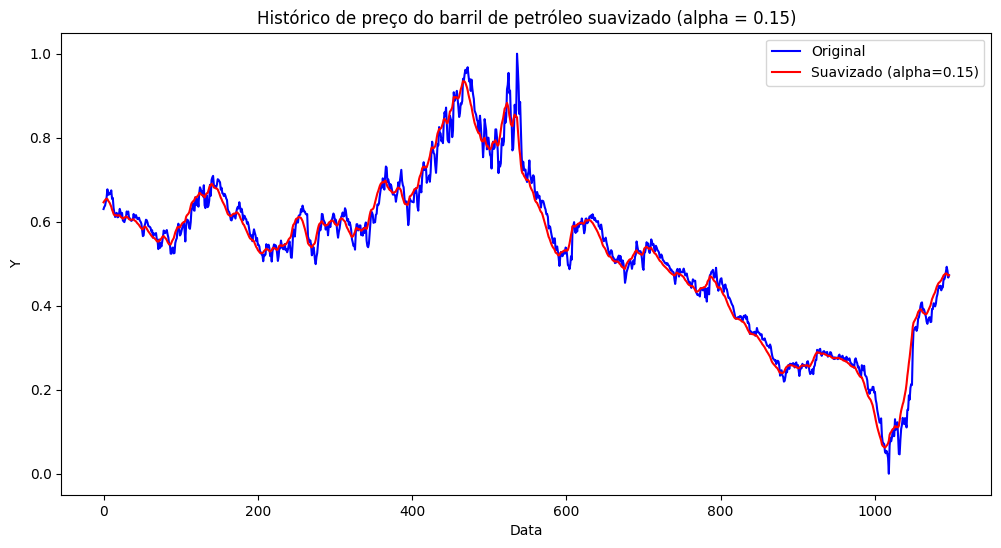

In [215]:
# suaviza o preço
alpha = 0.15
df_ml['smoothed_y'] = df_ml['y'].ewm(alpha = alpha, adjust = False).mean()

# plot da linha suavizada
plt.figure(figsize=(12, 6))
plt.plot(df_ml.index, df_ml['y'], label='Original', color='blue')
plt.plot(df_ml.index, df_ml['smoothed_y'], label=f'Suavizado (alpha={alpha})', color='red')
plt.title(f'Histórico de preço do barril de petróleo suavizado (alpha = {alpha})')
plt.xlabel('Data')
plt.ylabel('Y')
plt.legend()
plt.show()

In [216]:
lstm_model, lstm_scaler = executar_lstm(df_ml, pipeline, 'min_max_scaler', 'smoothed_y', 'ds', epochs=250)

Fazendo o split em treino e teste do dataset...
Total treino: 877
Total teste: 220
Configurando o modelo LSTM...
Gerando sequências temporais...
Iniciando o modelo LSTM...
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               40800     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/250
44/44 [==============================] - 2s 9ms/step - loss: 0.1138 - mean_squared_error: 0.1138
Epoch 2/250
44/44 [==============================] - 0s 8ms/step - loss: 0.0031 - mean_squared_error: 0.0031
Epoch 3/250
44/44 [===

In [217]:
# Função para prever os próximos 'num_prediction' pontos da série temporal
# Utiliza o modelo treinado para prever cada ponto sequencialmente
# A cada iteração, adiciona a previsão à lista 'prediction_list'
def lstm_predict(num_prediction, series, modelo, look_back = 5):
    prediction_list = series[-look_back:]

    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = modelo.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)

    prediction_list = prediction_list[look_back - 1:]

    return prediction_list

In [218]:
# Função para gerar as datas dos próximos 'num_prediction' dias
# Assume que o DataFrame 'df' possui uma coluna 'Date' contendo as datas
def lstm_predict_dates(num_prediction):
    last_date = df_ml['ds'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction + 1).tolist()

    return prediction_dates

In [219]:
num_prediction = 20 # definição dos próximos dias
forecast = lstm_predict(num_prediction, df_ml['y'].values.reshape((-1)), lstm_model, look_back=10)
forecast_dates = lstm_predict_dates(num_prediction)

1/1 [==============================] - 0s 24ms/step


In [220]:
forecast

array([0.63017895, 0.62418044, 0.6188547 , 0.61378318, 0.60870308,
       0.60387403, 0.59958756, 0.59542489, 0.59146249, 0.58768398,
       0.58414584, 0.58080131, 0.5776397 , 0.57466125, 0.57185656,
       0.56921142, 0.56671685, 0.56436813, 0.5621556 , 0.56007081,
       0.55810589])

In [221]:
forecast_dates

[Timestamp('2024-04-22 00:00:00'),
 Timestamp('2024-04-23 00:00:00'),
 Timestamp('2024-04-24 00:00:00'),
 Timestamp('2024-04-25 00:00:00'),
 Timestamp('2024-04-26 00:00:00'),
 Timestamp('2024-04-27 00:00:00'),
 Timestamp('2024-04-28 00:00:00'),
 Timestamp('2024-04-29 00:00:00'),
 Timestamp('2024-04-30 00:00:00'),
 Timestamp('2024-05-01 00:00:00'),
 Timestamp('2024-05-02 00:00:00'),
 Timestamp('2024-05-03 00:00:00'),
 Timestamp('2024-05-04 00:00:00'),
 Timestamp('2024-05-05 00:00:00'),
 Timestamp('2024-05-06 00:00:00'),
 Timestamp('2024-05-07 00:00:00'),
 Timestamp('2024-05-08 00:00:00'),
 Timestamp('2024-05-09 00:00:00'),
 Timestamp('2024-05-10 00:00:00'),
 Timestamp('2024-05-11 00:00:00'),
 Timestamp('2024-05-12 00:00:00')]

In [222]:
scaler = pipeline.named_steps['min_max_scaler'].scaler

In [223]:
df = pd.DataFrame(df_ml)
df_past = df[['ds', 'y']]
df_past.rename(columns={'y': 'valor_real'}, inplace=True)
df_past['ds'] = pd.to_datetime(df_past['ds'])
df_past['valor_real'] = scaler.inverse_transform(df_past['valor_real'].values.reshape(-1, 1))
df_past['previsao'] = np.nan
df_past['previsao'].iloc[-1] = df_past['valor_real'].iloc[-1]
df_past

,ds,valor_real,previsao
1096,2020-01-01,67.77,NaN
1095,2020-01-02,67.05,NaN
1094,2020-01-03,69.08,NaN
1093,2020-01-06,70.25,NaN
1092,2020-01-07,68.74,NaN
...,...,...,...
4,2024-04-15,90.84,NaN
3,2024-04-17,89.54,NaN
2,2024-04-18,88.34,NaN
1,2024-04-19,87.96,NaN


In [224]:
df_past['valor_real'].values.reshape(-1, 1)

array([[67.77],
       [67.05],
       [69.08],
       ...,
       [88.34],
       [87.96],
       [87.3 ]])

In [225]:
forecast = forecast.reshape(-1, 1)
forecast = scaler.inverse_transform(forecast)
forecast

array([[87.3       ],
       [86.55582491],
       [85.89511427],
       [85.2659414 ],
       [84.63570371],
       [84.03661188],
       [83.50483266],
       [82.98841192],
       [82.49683687],
       [82.02807402],
       [81.5891334 ],
       [81.17421029],
       [80.78198106],
       [80.41247528],
       [80.06452463],
       [79.73636919],
       [79.42689239],
       [79.13551006],
       [78.86102428],
       [78.60238502],
       [78.35861621]])

In [226]:
df_future = pd.DataFrame(columns=['ds', 'valor_real', 'previsao'])
df_future['ds'] = forecast_dates
df_future['valor_real'] = np.nan
df_future['previsao'] = forecast.flatten()
df_future.tail()

,ds,valor_real,previsao
16,2024-05-08,NaN,79.426892
17,2024-05-09,NaN,79.135510
18,2024-05-10,NaN,78.861024
19,2024-05-11,NaN,78.602385
20,2024-05-12,NaN,78.358616


In [227]:
results_past =  df_past
results_past = results_past.set_index('ds')

plot_data = [
    go.Scatter(
        x=results_past.index,
        y=results_past['valor_real'],
        name='Atual'
    ),
    go.Scatter(
        x=df_future['ds'],
        y=df_future['previsao'],
        name='Previsão'
    )
]

plot_layout = go.Layout(
    title='Forecast IBOVESPA'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

## Exportando

In [244]:
import joblib
from keras.models import load_model

In [245]:
lstm_model.save('lstm')
joblib.dump(scaler, 'lstm-scaler.pkl')

['lstm-scaler.pkl']

In [246]:
lstm_model_recarregado = load_model('lstm')
scaler_recarregado = joblib.load('lstm-scaler.pkl')

# Referências

1. https://pt.wikipedia.org/wiki/Guerra_do_Golfo
2. https://pt.wikipedia.org/wiki/Ataques_de_11_de_setembro_de_2001
3. https://pt.wikipedia.org/wiki/Guerra_do_Iraque
4. https://pt.wikipedia.org/wiki/Crise_financeira_de_2007%E2%80%932008
5. https://pt.wikipedia.org/wiki/Primavera_%C3%81rabe
6. https://pt.wikipedia.org/wiki/Guerra_Civil_L%C3%ADbia_(2011)
7. https://pt.wikipedia.org/wiki/Guerra_Civil_S%C3%ADria
8. https://economia.uol.com.br/noticias/afp/2014/11/27/opep-mantem-teto-de-producao-inalterado.htm
9. https://g1.globo.com/economia/noticia/2015/01/entenda-queda-do-preco-do-petroleo-e-seus-efeitos.html#:~:text=Os%20principais%20apontados%20como%20%22culpados,na%20Europa%20e%20na%20%C3%81sia
10. https://pt.wikipedia.org/wiki/Pandemia_de_COVID-19
11. https://agenciabrasil.ebc.com.br/economia/noticia/2022-06/economia-segue-em-recuperacao-com-crescimento-robusto-diz-secretaria
12. https://pt.wikipedia.org/wiki/Invas%C3%A3o_da_Ucr%C3%A2nia_pela_R%C3%BAssia_(2022%E2%80%93presente)